<a href="https://colab.research.google.com/github/TKhahahah/Text_Analytics/blob/main/2nd_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second table

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyarrow
import pyarrow.parquet as pq

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
taxi_data = pq.read_table('/content/drive/MyDrive/DTW2/cleaned_1.parquet')
taxi_data = taxi_data.to_pandas()
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,date,time,weekday,duration
0,2,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,0.0,2.5,0.0,2024-10-01,0,Tuesday,17.700000
1,1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,0.0,2.5,0.0,2024-10-01,0,Tuesday,13.083333
2,1,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,0.0,2.5,0.0,2024-10-01,0,Tuesday,9.100000
3,1,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,0.0,2.5,0.0,2024-10-01,0,Tuesday,10.850000
5,2,2024-10-01 00:31:20,2024-10-01 00:36:00,2.0,0.97,1.0,137,137,7.200000,2.44,0.0,2.5,0.0,2024-10-01,0,Tuesday,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148501,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,0.0,2.5,0.0,2024-12-31,23,Tuesday,10.566667
11148504,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,0.0,2.5,0.0,2024-12-31,23,Tuesday,20.333333
11148508,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,0.0,2.5,0.0,2024-12-31,23,Tuesday,25.316667
11148509,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,165,61,27.070000,0.00,0.0,2.5,0.0,2024-12-31,23,Tuesday,20.933333


In [5]:
zone_location = pd.read_csv('/content/drive/MyDrive/DTW2/taxi_zone_lookup.csv')
zone_location

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [6]:
import geopandas as gpd

gdf = gpd.read_file("/content/drive/MyDrive/DTW2/taxi_zones")
print(gdf.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [7]:
merged_gdf = gdf.merge(zone_location, on='LocationID', how='left')
print(merged_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

         Borough                     Zone service_zone  
0            EWR           Newark Airport          EWR  
1 

In [8]:
#create 2nd table to merging pl_df_pandas and merge_gdf
map_data = taxi_data.merge(merged_gdf, left_on='PULocationID', right_on='LocationID', how='left')
map_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,...,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Borough,Zone,service_zone
0,2,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,...,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",Manhattan,Midtown East,Yellow Zone
1,1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,...,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",Manhattan,Clinton East,Yellow Zone
2,1,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,...,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",Manhattan,Lincoln Square East,Yellow Zone
3,1,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,...,233.0,0.048036,0.000116,UN/Turtle Bay South,233.0,Manhattan,"MULTIPOLYGON (((993816.792 213230.43, 993857.4...",Manhattan,UN/Turtle Bay South,Yellow Zone
4,2,2024-10-01 00:31:20,2024-10-01 00:36:00,2.0,0.97,1.0,137,137,7.200000,2.44,...,137.0,0.046108,0.000116,Kips Bay,137.0,Manhattan,"POLYGON ((991954.728 209026.462, 991949.076 20...",Manhattan,Kips Bay,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10572767,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,...,188.0,0.097798,0.000313,Prospect-Lefferts Gardens,188.0,Brooklyn,"POLYGON ((996098.526 181302.644, 996121.518 18...",Brooklyn,Prospect-Lefferts Gardens,Boro Zone
10572768,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,...,145.0,0.114314,0.000347,Long Island City/Hunters Point,145.0,Queens,"POLYGON ((999916.846 213275.139, 1000066.513 2...",Queens,Long Island City/Hunters Point,Boro Zone
10572769,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,...,181.0,0.089537,0.000307,Park Slope,181.0,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.59 181...",Brooklyn,Park Slope,Boro Zone
10572770,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,165,61,27.070000,0.00,...,165.0,0.088608,0.000354,Midwood,165.0,Brooklyn,"POLYGON ((995312.051 168409.655, 995365.558 16...",Brooklyn,Midwood,Boro Zone


In [9]:
map_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'fare_amount', 'tip_amount', 'tolls_amount',
       'congestion_surcharge', 'Airport_fee', 'date', 'time', 'weekday',
       'duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'Borough', 'Zone', 'service_zone'],
      dtype='object')

In [10]:
map_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
fare_amount,0
tip_amount,0


In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np

def clean_geo_missing(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    ตรวจและจัดการ missing values สำหรับข้อมูลเชิงพื้นที่ (GeoDataFrame)
    - drop geometry ที่หาย
    - fillna สำหรับ attribute (string, numeric)
    - แสดงรายงานก่อนและหลังทำความสะอาด
    """

    print("🔍 ตรวจสอบ missing values ก่อนทำความสะอาด:")
    print(gdf.isna().sum())
    print("-" * 60)

    # 1️⃣ ลบ geometry ที่หาย (เพราะ plot/map ไม่ได้)
    if 'geometry' in gdf.columns:
        missing_geo = gdf['geometry'].isna().sum()
        if missing_geo > 0:
            print(f"🗑️ ลบ geometry ที่หาย {missing_geo} แถว")
            gdf = gdf.dropna(subset=['geometry'])

    # 2️⃣ จัดการคอลัมน์อื่น ๆ
    for col in gdf.columns:
        if col == 'geometry':
            continue  # geometry จัดการแล้ว

        if gdf[col].isna().sum() == 0:
            continue  # ไม่มี missing

        # ✅ ถ้าเป็นตัวเลข — ใช้ median (ถ้าไม่ได้ ใช้ mean)
        if pd.api.types.is_numeric_dtype(gdf[col]):
            median_val = gdf[col].median()
            if np.isnan(median_val):
                mean_val = gdf[col].mean()
                gdf[col] = gdf[col].fillna(mean_val)
                print(f"🔹 {col}: เติมค่า missing ด้วย mean = {mean_val:.2f}")
            else:
                gdf[col] = gdf[col].fillna(median_val)
                print(f"🔹 {col}: เติมค่า missing ด้วย median = {median_val:.2f}")

        # ✅ ถ้าเป็นข้อความ — เติมด้วย 'Unknown'
        elif gdf[col].dtype == 'object' or pd.api.types.is_categorical_dtype(gdf[col]):
            gdf[col] = gdf[col].fillna('Unknown')
            print(f"🔹 {col}: เติมค่า missing ด้วย 'Unknown'")

    # 3️⃣ แสดงรายงานหลังทำ
    print("\n✅ ตรวจสอบอีกครั้งหลังทำความสะอาด:")
    print(gdf.isna().sum())

    print("-" * 60)
    print(f"✅ ข้อมูลสะอาดแล้ว ({len(gdf)} แถว)")
    return gdf


In [12]:
map_data = clean_geo_missing(map_data)


🔍 ตรวจสอบ missing values ก่อนทำความสะอาด:
VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
fare_amount               0
tip_amount                0
tolls_amount              0
congestion_surcharge      0
Airport_fee               0
date                      0
time                      0
weekday                   0
duration                  0
OBJECTID                 68
Shape_Leng               68
Shape_Area               68
zone                     68
LocationID               68
borough                  68
geometry                 68
Borough                  68
Zone                     68
service_zone             68
dtype: int64
------------------------------------------------------------
🗑️ ลบ geometry ที่หาย 68 แถว

✅ ตรวจสอบอีกครั้งหลังทำความสะอาด:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropo

## นับจำนวนการเดินทางต่อเขต เพื่อดูว่าเขตไหนมีการเดินทางมากที่สุด

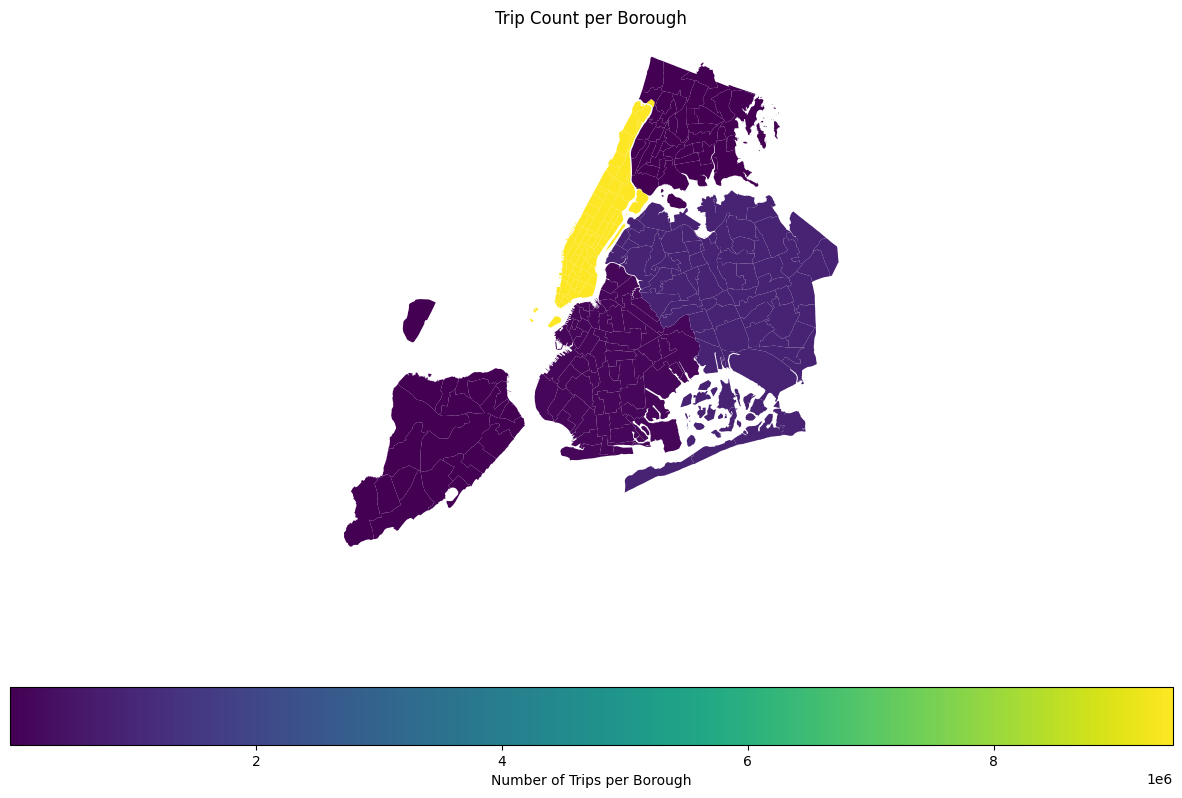

In [13]:
# Count the number of trips per borough
borough_counts = map_data['borough'].value_counts().reset_index()
borough_counts.columns = ['borough', 'trip_count']

# Merge the trip counts with the merged GeoDataFrame (which contains borough geometries)
borough_geo_data = merged_gdf.merge(borough_counts, on='borough', how='left')

# Fill NaN values in trip_count with 0 (for boroughs with no trips in the dataset)
borough_geo_data['trip_count'] = borough_geo_data['trip_count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
borough_geo_data.plot(column='trip_count', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Trips per Borough",
                                   'orientation': "horizontal"})
ax.set_title('Trip Count per Borough')
ax.set_axis_off()
plt.show()

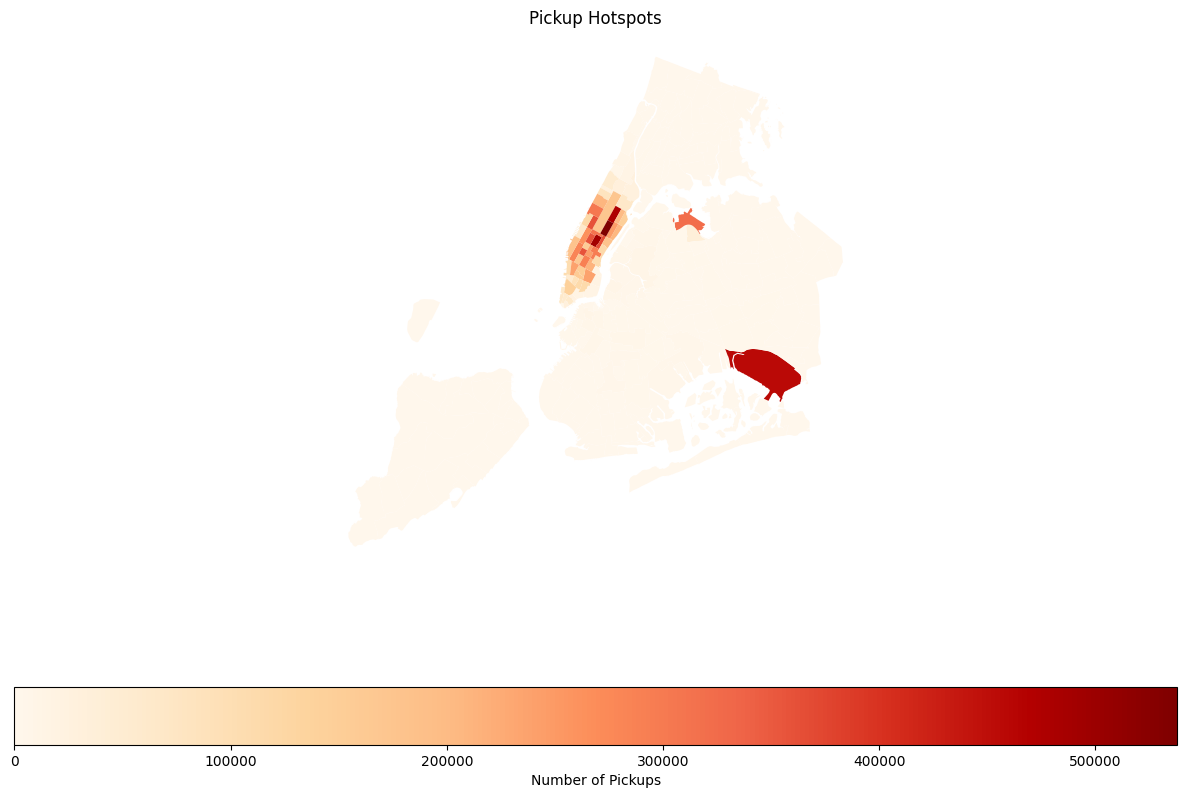

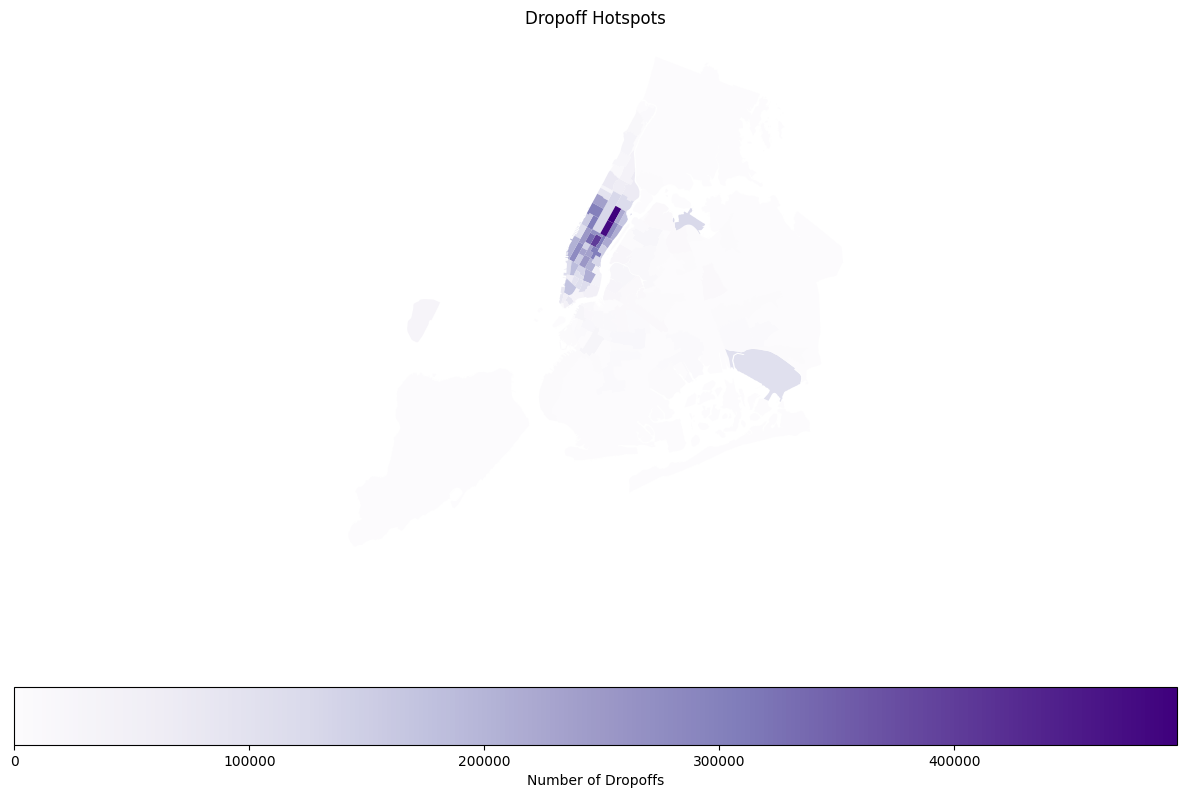

In [14]:
# Count the frequency of each pickup and dropoff location
pickup_counts = map_data['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

dropoff_counts = map_data['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge the counts with the geographical data
location_geo_data = merged_gdf.merge(pickup_counts, on='LocationID', how='left')
location_geo_data = location_geo_data.merge(dropoff_counts, on='LocationID', how='left')

# Fill NaN values with 0
location_geo_data['pickup_count'] = location_geo_data['pickup_count'].fillna(0)
location_geo_data['dropoff_count'] = location_geo_data['dropoff_count'].fillna(0)

# Visualize pickup hotspots
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
location_geo_data.plot(column='pickup_count', ax=ax, legend=True,
                       legend_kwds={'label': "Number of Pickups",
                                    'orientation': "horizontal"}, cmap='OrRd')
ax.set_title('Pickup Hotspots')
ax.set_axis_off()
plt.show()

# Visualize dropoff hotspots
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
location_geo_data.plot(column='dropoff_count', ax=ax, legend=True,
                       legend_kwds={'label': "Number of Dropoffs",
                                    'orientation': "horizontal"}, cmap='Purples')
ax.set_title('Dropoff Hotspots')
ax.set_axis_off()
plt.show()

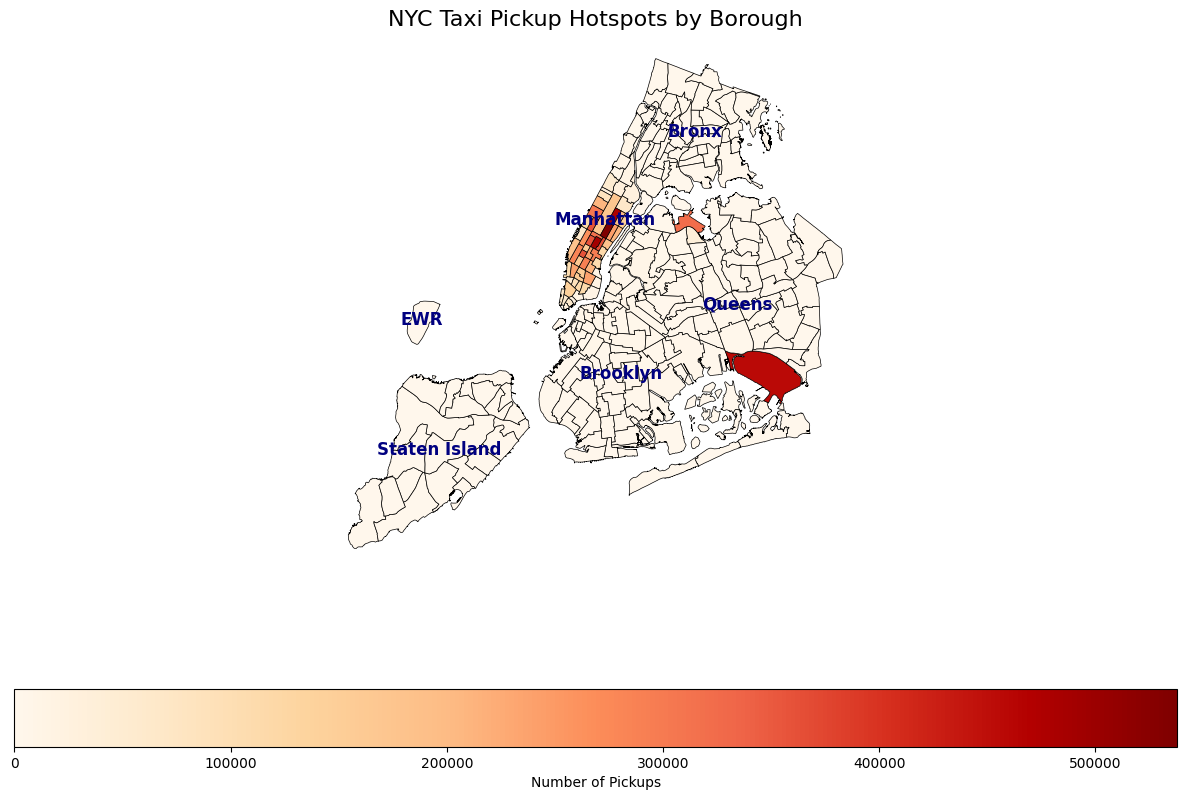

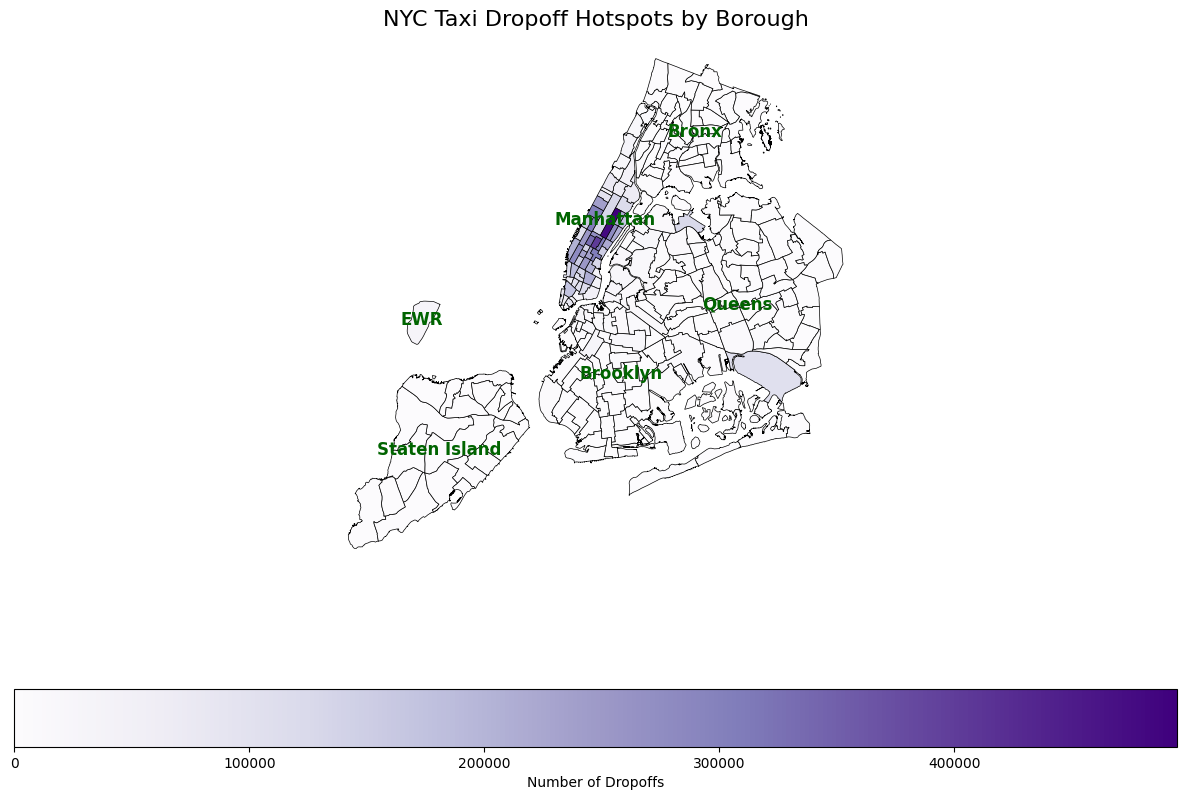

In [15]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# แสดง Pickup Hotspots พร้อมชื่อ Borough
# --------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
location_geo_data.plot(
    column='pickup_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={
        'label': "Number of Pickups",
        'orientation': "horizontal"
    },
    edgecolor='black',
    linewidth=0.5
)

# เพิ่มชื่อ Borough
borough_centroids = location_geo_data.dissolve(by='Borough').centroid
for idx, row in borough_centroids.items():
    x, y = row.x, row.y
    ax.text(
        x, y, idx, fontsize=12, fontweight='bold',
        color='navy', ha='center', va='center'
    )

ax.set_title('NYC Taxi Pickup Hotspots by Borough', fontsize=16)
ax.set_axis_off()
plt.show()

# --------------------------------------------------
# แสดง Dropoff Hotspots พร้อมชื่อ Borough
# --------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
location_geo_data.plot(
    column='dropoff_count',
    ax=ax,
    legend=True,
    cmap='Purples',
    legend_kwds={
        'label': "Number of Dropoffs",
        'orientation': "horizontal"
    },
    edgecolor='black',
    linewidth=0.5
)

# เพิ่มชื่อ Borough เช่นเดียวกัน
borough_centroids = location_geo_data.dissolve(by='Borough').centroid
for idx, row in borough_centroids.items():
    x, y = row.x, row.y
    ax.text(
        x, y, idx, fontsize=12, fontweight='bold',
        color='darkgreen', ha='center', va='center'
    )

ax.set_title('NYC Taxi Dropoff Hotspots by Borough', fontsize=16)
ax.set_axis_off()
plt.show()


In [16]:
count = map_data['borough'].value_counts()
print(count)

borough
Manhattan        9454076
Queens            915656
Brooklyn          170476
Bronx              31962
Staten Island        469
EWR                   65
Name: count, dtype: int64


In [17]:
average_fare_per_zone = map_data.groupby('Zone')['fare_amount'].mean().reset_index()
average_fare_per_zone.columns = ['Zone', 'average_fare']
print(average_fare_per_zone)

                        Zone  average_fare
0    Allerton/Pelham Gardens     32.272135
1              Alphabet City     17.540400
2    Arrochar/Fort Wadsworth      7.429385
3                    Astoria     21.808581
4               Astoria Park     38.201777
..                       ...           ...
253       Woodlawn/Wakefield     34.345964
254                 Woodside     24.707638
255       World Trade Center     22.978346
256           Yorkville East     14.724244
257           Yorkville West     13.833571

[258 rows x 2 columns]


In [18]:
# Sort zones by average fare in descending order to see the highest
zones_highest_fare = average_fare_per_zone.sort_values(by='average_fare', ascending=False)
print("Zones with the Highest Average Fare Amount:")
display(zones_highest_fare.head(10)) # Display top 10

# Sort zones by average fare in ascending order to see the lowest
zones_lowest_fare = average_fare_per_zone.sort_values(by='average_fare', ascending=True)
print("\nZones with the Lowest Average Fare Amount:")
display(zones_lowest_fare.head(10)) # Display bottom 10

Zones with the Highest Average Fare Amount:


,Zone,average_fare
198,Rossville/Woodrow,44.299998
94,Freshkills Park,44.299998
121,JFK Airport,41.792486
124,Jamaica Bay,41.233332
88,Flushing Meadows-Corona Park,39.977797
81,Far Rockaway,39.709807
109,Hammels/Arverne,39.437239
131,LaGuardia Airport,39.424390
65,East Elmhurst,39.093563
6,Baisley Park,38.389724



Zones with the Lowest Average Fare Amount:


,Zone,average_fare
2,Arrochar/Fort Wadsworth,7.429385
102,Great Kills Park,10.000000
231,Upper East Side South,13.362868
230,Upper East Side North,13.607402
134,Lenox Hill West,13.646533
257,Yorkville West,13.833571
233,Upper West Side South,14.280604
232,Upper West Side North,14.310094
136,Lincoln Square West,14.410496
135,Lincoln Square East,14.656168


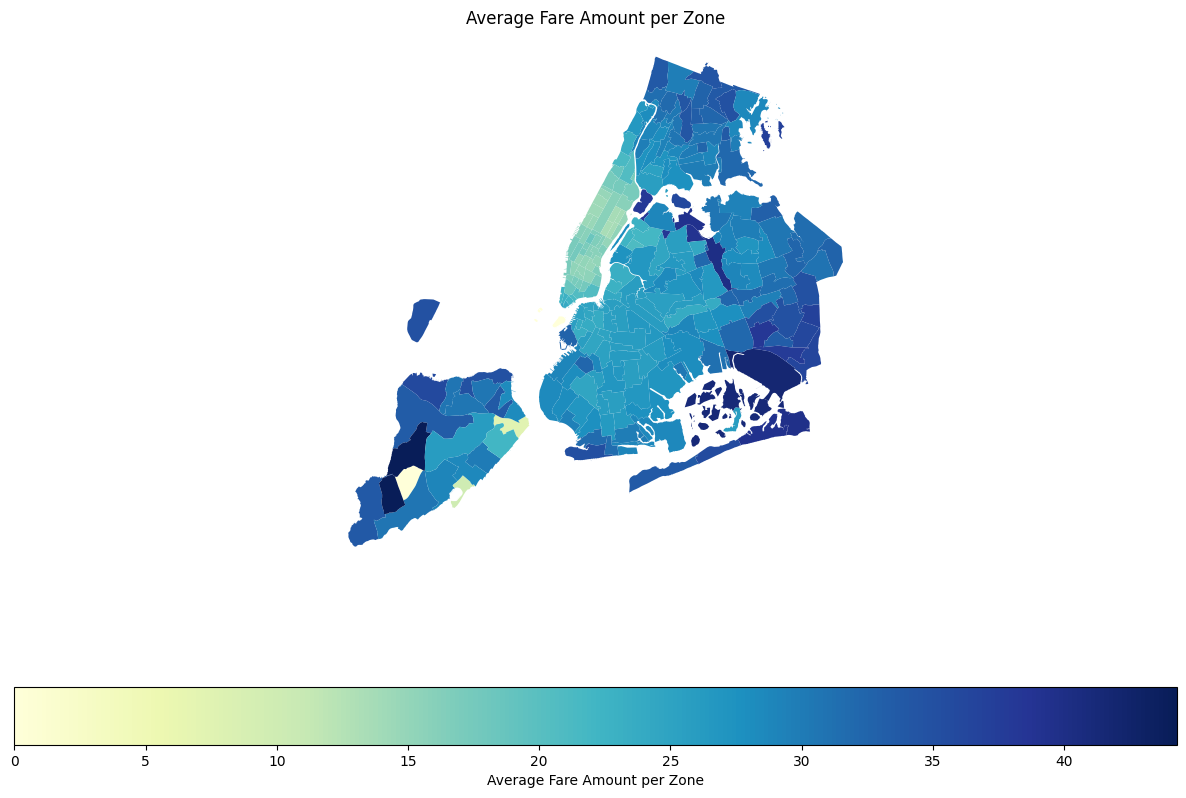

In [19]:
# Calculate the average fare amount per zone
average_fare_per_zone = map_data.groupby('Zone')['fare_amount'].mean().reset_index()
average_fare_per_zone.columns = ['Zone', 'average_fare']

# Merge the average fare data with the geographical zone data
zone_geo_data_fare = merged_gdf.merge(average_fare_per_zone, on='Zone', how='left')

# Fill NaN values with 0 (for zones with no data or no trips)
zone_geo_data_fare['average_fare'] = zone_geo_data_fare['average_fare'].fillna(0)

# Plot the map of average fare amount per zone
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
zone_geo_data_fare.plot(column='average_fare', ax=ax, legend=True,
                        legend_kwds={'label': "Average Fare Amount per Zone",
                                     'orientation': "horizontal"}, cmap='YlGnBu')
ax.set_title('Average Fare Amount per Zone')
ax.set_axis_off()
plt.show()

In [20]:
#count PULocation and DOLocation to see top 10 most pickup and drop off places
pickup_location_counts = map_data['PULocationID'].value_counts()
dropoff_location_counts = map_data['DOLocationID'].value_counts()


/tmp/ipython-input-1887785044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_location_counts.head(top_n).index, y=pickup_location_counts.head(top_n).values, palette='viridis')


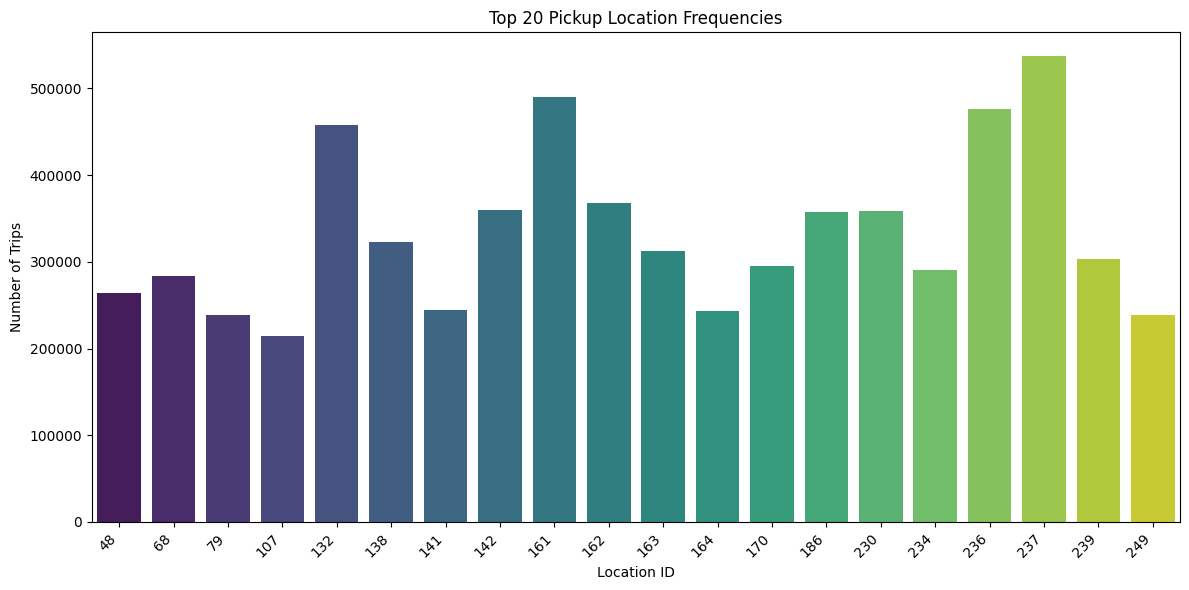

/tmp/ipython-input-1887785044.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropoff_location_counts.head(top_n).index, y=dropoff_location_counts.head(top_n).values, palette='magma')


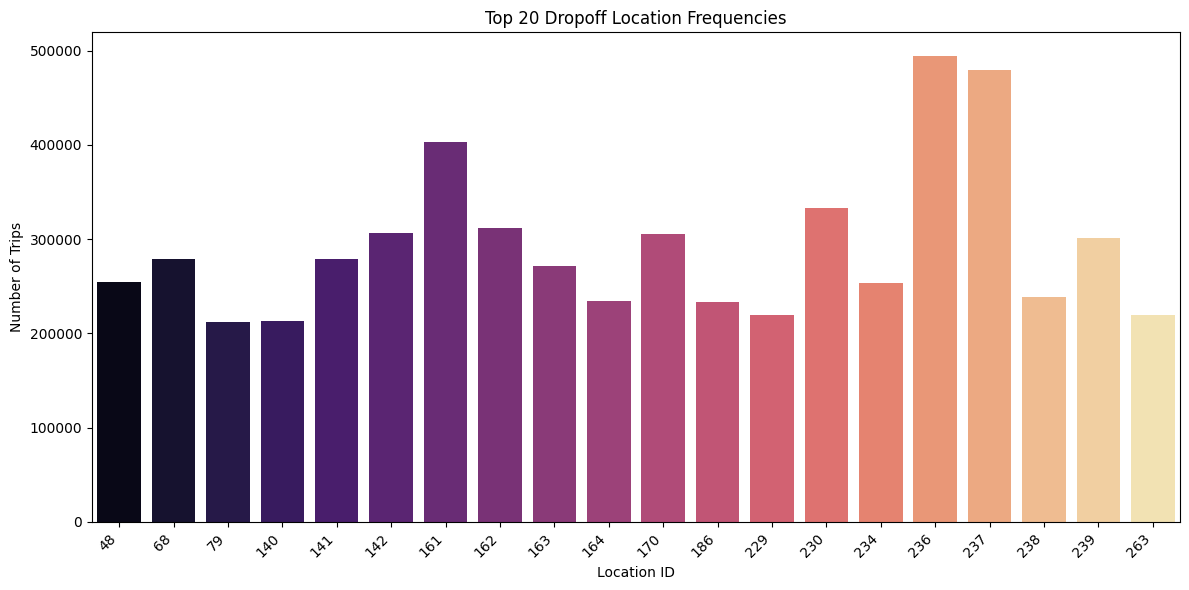

In [21]:
# Visualize top N pickup location frequencies
top_n = 20  # You can adjust the number of top locations to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=pickup_location_counts.head(top_n).index, y=pickup_location_counts.head(top_n).values, palette='viridis')
plt.title(f'Top {top_n} Pickup Location Frequencies')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top N dropoff location frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=dropoff_location_counts.head(top_n).index, y=dropoff_location_counts.head(top_n).values, palette='magma')
plt.title(f'Top {top_n} Dropoff Location Frequencies')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

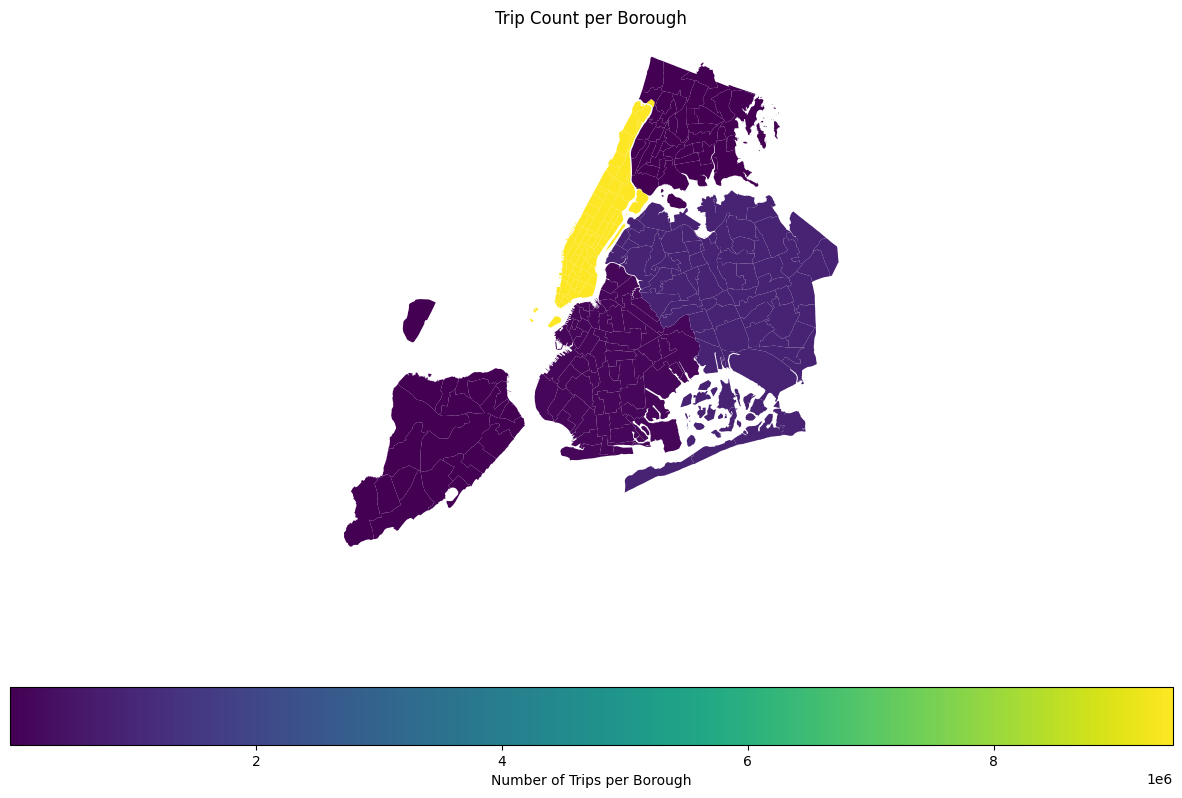

In [22]:
# Count the number of trips per borough
borough_counts = map_data['borough'].value_counts().reset_index()
borough_counts.columns = ['borough', 'trip_count']

# Merge the trip counts with the merged GeoDataFrame (which contains borough geometries)
borough_geo_data = merged_gdf.merge(borough_counts, on='borough', how='left')

# Fill NaN values in trip_count with 0 (for boroughs with no trips in the dataset)
borough_geo_data['trip_count'] = borough_geo_data['trip_count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
borough_geo_data.plot(column='trip_count', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Trips per Borough",
                                   'orientation': "horizontal"})
ax.set_title('Trip Count per Borough')
ax.set_axis_off()
plt.show()

## Explore Data

In [ ]:
# Descriptive statistics

# Data visualization
# Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


In [23]:
map_data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,date,time,duration,OBJECTID,Shape_Leng,Shape_Area,LocationID
count,1.057270e+07,10572704,10572704,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07,10572704.0,1.057270e+07,10572704.0,10572704,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07,1.057270e+07
mean,1.767809e+00,2024-11-15 05:09:03.277154,2024-11-15 05:26:45.354910,1.307575e+00,2.546482e+00,2.114444e+00,1.647722e+02,1.633278e+02,1.810658e+01,3.191711e+00,0.0,2.500000e+00,0.0,2024-11-14 14:17:06.567732,1.436470e+01,1.770130e+01,1.647724e+02,5.567640e-02,2.057510e-04,1.647722e+02
min,1.000000e+00,2002-12-31 22:17:43,2002-12-31 22:23:55,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.0,2.500000e+00,0.0,2002-12-31 00:00:00,0.000000e+00,1.016667e+00,1.000000e+00,1.927050e-02,1.802598e-05,1.000000e+00
25%,2.000000e+00,2024-10-24 00:30:49.750000,2024-10-24 00:45:40,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,9.300000e+00,0.000000e+00,0.0,2.500000e+00,0.0,2024-10-24 00:00:00,1.100000e+01,8.316667e+00,1.320000e+02,3.580391e-02,6.576977e-05,1.320000e+02
50%,2.000000e+00,2024-11-15 07:49:47.500000,2024-11-15 08:06:01,1.000000e+00,1.760000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.420000e+01,2.800000e+00,0.0,2.500000e+00,0.0,2024-11-15 00:00:00,1.500000e+01,1.376667e+01,1.620000e+02,4.221260e-02,9.425384e-05,1.620000e+02
75%,2.000000e+00,2024-12-07 19:28:00.500000,2024-12-07 19:48:02,1.000000e+00,3.340000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.319000e+01,4.450000e+00,0.0,2.500000e+00,0.0,2024-12-07 00:00:00,1.900000e+01,2.233333e+01,2.340000e+02,5.417985e-02,1.430930e-04,2.340000e+02
max,6.000000e+00,2025-03-23 20:42:06,2025-03-23 22:52:56,6.000000e+00,6.750000e+00,9.900000e+01,2.630000e+02,2.630000e+02,4.430000e+01,1.100000e+01,0.0,2.500000e+00,0.0,2025-03-23 00:00:00,2.300000e+01,1.800000e+02,2.630000e+02,4.334697e-01,4.866340e-03,2.630000e+02
std,4.230424e-01,NaN,NaN,7.200906e-01,2.038059e+00,1.010408e+01,6.423523e+01,6.922892e+01,1.149006e+01,3.005058e+00,0.0,3.498446e-01,0.0,NaN,5.827242e+00,1.418332e+01,6.423502e+01,4.535149e-02,4.069369e-04,6.423523e+01


/tmp/ipython-input-21832310.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(taxi_data['fare_amount'], bins=50, kde=True, palette='cividis')


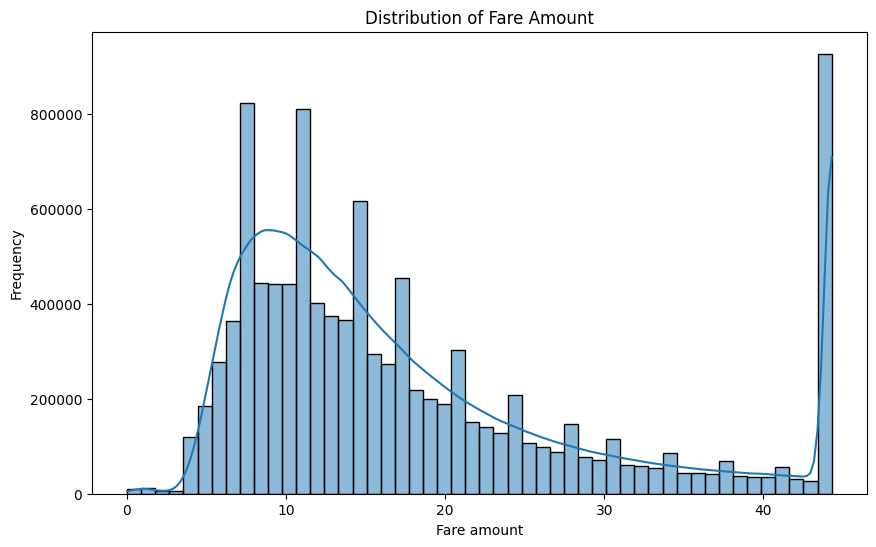

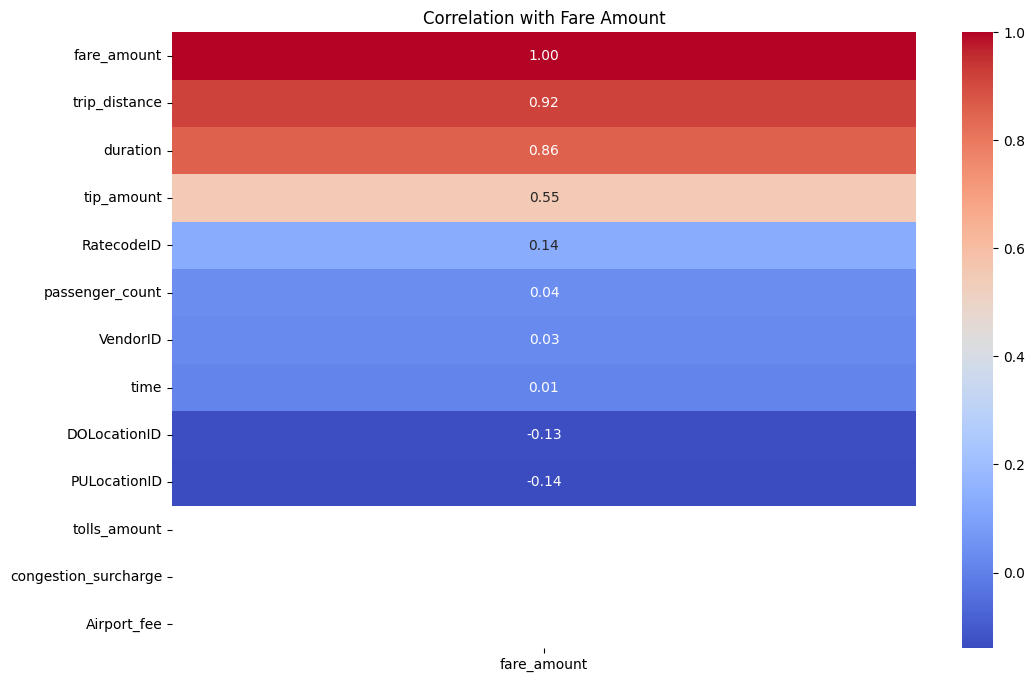

In [24]:
# Data visualization of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(taxi_data['fare_amount'], bins=50, kde=True, palette='cividis')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare amount')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis with the target variable
numerical_cols = taxi_data.select_dtypes(include=np.number).columns
correlation_matrix = taxi_data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['fare_amount']].sort_values(by='fare_amount', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Fare Amount')
plt.show()

In [25]:
# Count the frequency of trips per hour of the day
trips_per_hour = map_data['time'].value_counts().sort_index()
print("Frequency of trips per hour of the day:")
display(trips_per_hour)

Frequency of trips per hour of the day:


,count
time,
0,305464
1,195279
2,123169
3,79991
4,59656
5,67424
6,146378
7,294262
8,398814


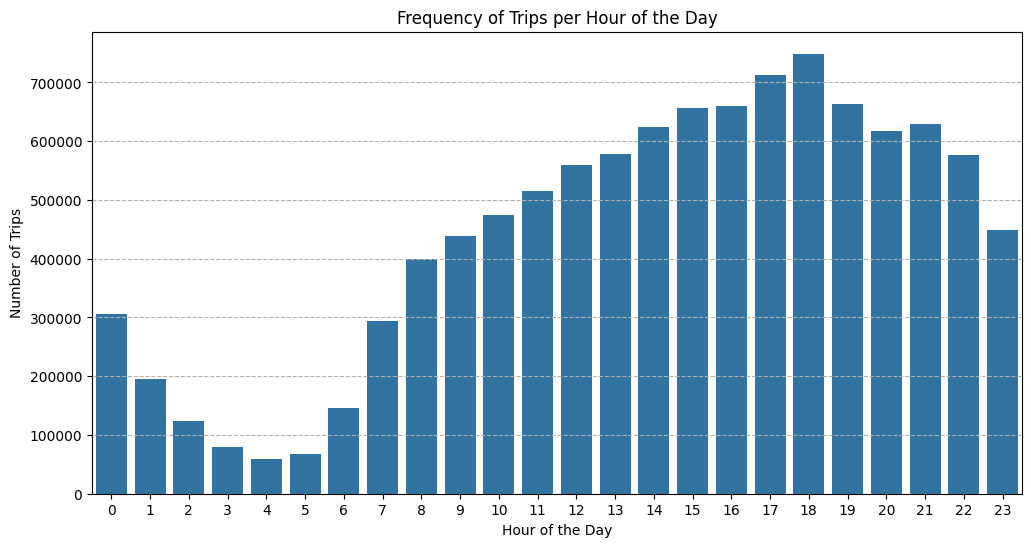

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values)
plt.title('Frequency of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


Frequency of trips per weekday:


,count
weekday,
Friday,1586931
Monday,1291696
Saturday,1643517
Sunday,1368584
Thursday,1594060
Tuesday,1566225
Wednesday,1521691


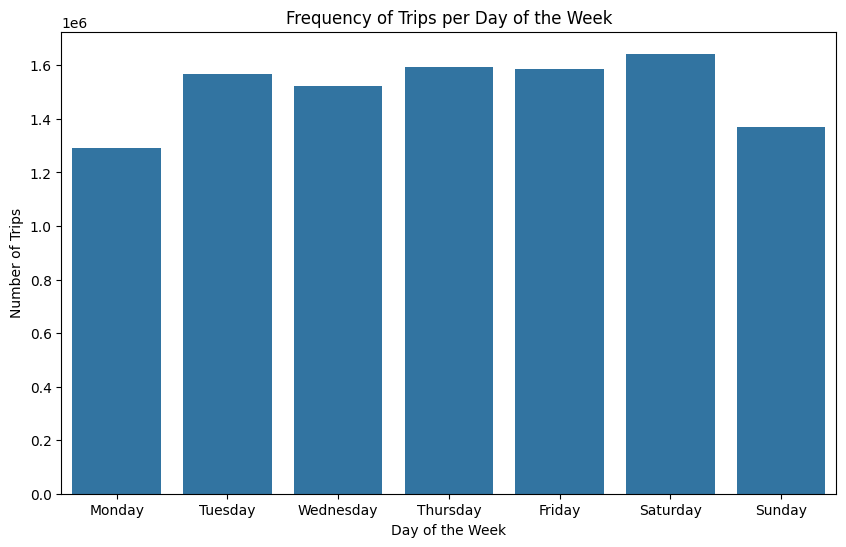

In [27]:
# Count the frequency of trips per weekday
trips_per_weekday = map_data['weekday'].value_counts().sort_index()
print("\nFrequency of trips per weekday:")
display(trips_per_weekday)

# Visualize the frequency of trips per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Frequency of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

In [28]:
# Display the correlation between trip_distance and fare_amount
print(f"The correlation between trip_distance and fare_amount is: {correlation_matrix.loc['trip_distance', 'fare_amount']:.2f}")

The correlation between trip_distance and fare_amount is: 0.92


In [29]:
# Display the correlation between trip_distance and fare_amount
print(f"The correlation between trip_distance and tip_amount is: {correlation_matrix.loc['trip_distance', 'tip_amount']:.2f}")

The correlation between trip_distance and tip_amount is: 0.50


Text(0.5, 1.0, 'Correlation between trip_distance and tip_amount')

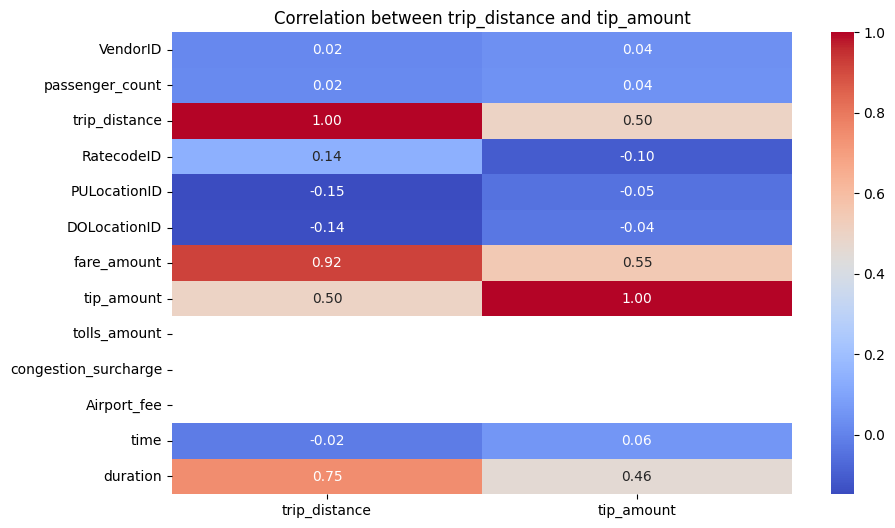

In [30]:
# tree map for correlation between trip_distance and tip_amount
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['trip_distance', 'tip_amount']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between trip_distance and tip_amount')

In [36]:
# Calculate the total amount per month
map_data.loc[:, 'month'] = map_data['date'].dt.to_period('M')
monthly_total_amount = map_data.groupby('month')['fare_amount'].sum()

In [37]:
monthly_total_amount = map_data.groupby(map_data['date'].dt.to_period('M'))['fare_amount'].sum()
print(monthly_total_amount)

date
2002-12    7.900000e+00
2009-01    1.063000e+02
2024-09    2.915000e+02
2024-10    6.610762e+07
2024-11    6.172946e+07
2024-12    6.359800e+07
2025-02    2.960000e+01
2025-03    3.960000e+01
Freq: M, Name: fare_amount, dtype: float64


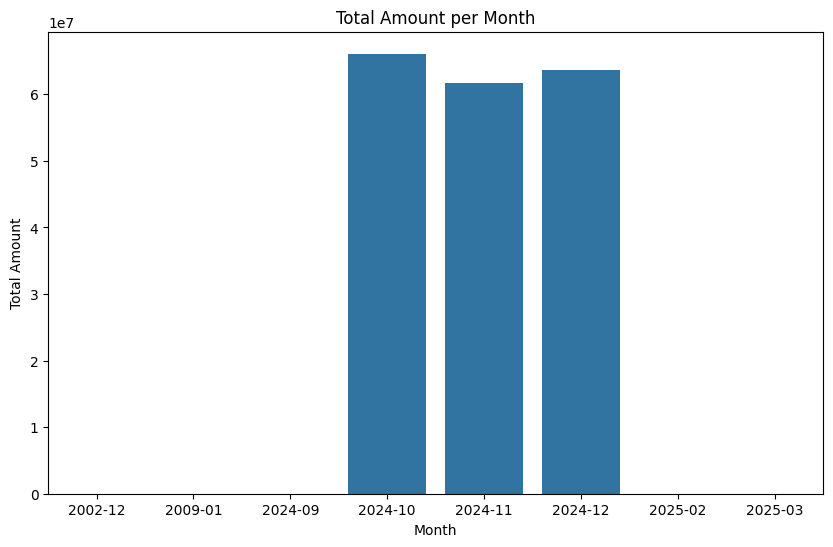

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_total_amount.index, y=monthly_total_amount.values)
plt.title('Total Amount per Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Fare Amount')

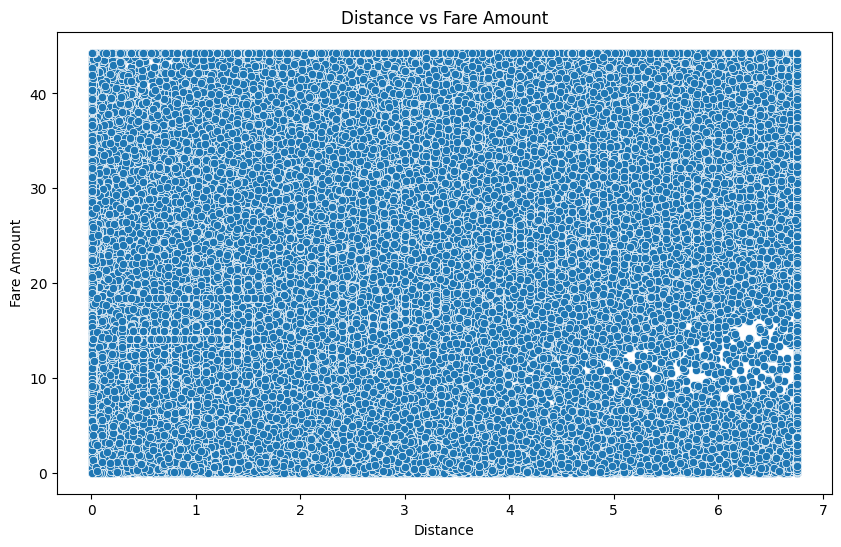

In [39]:
# scatter plot between distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=map_data)
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')